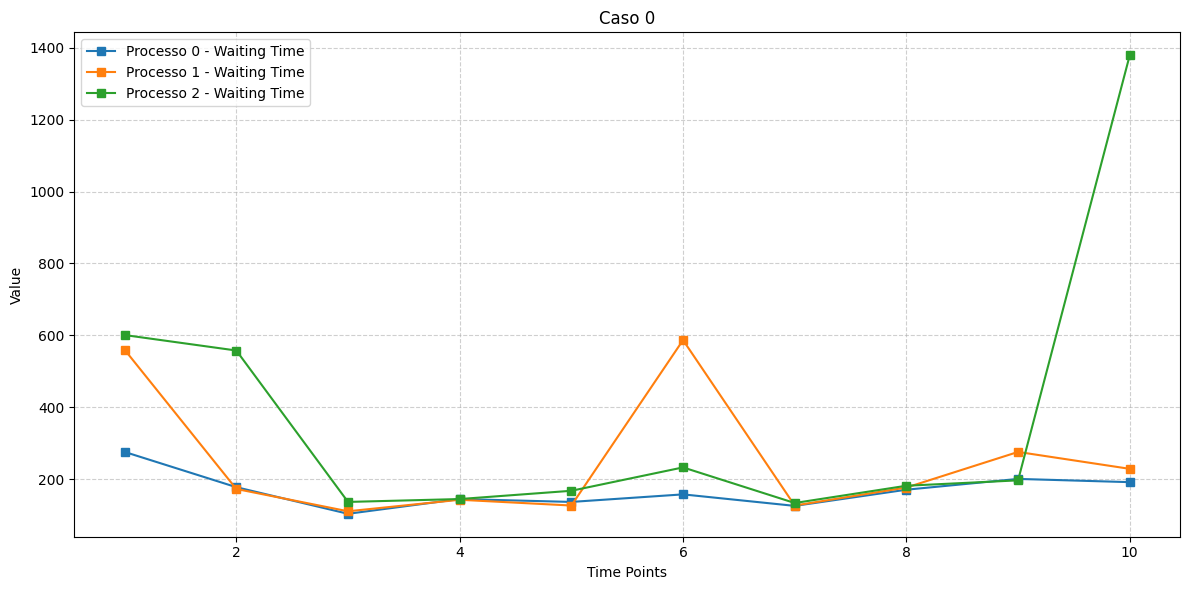

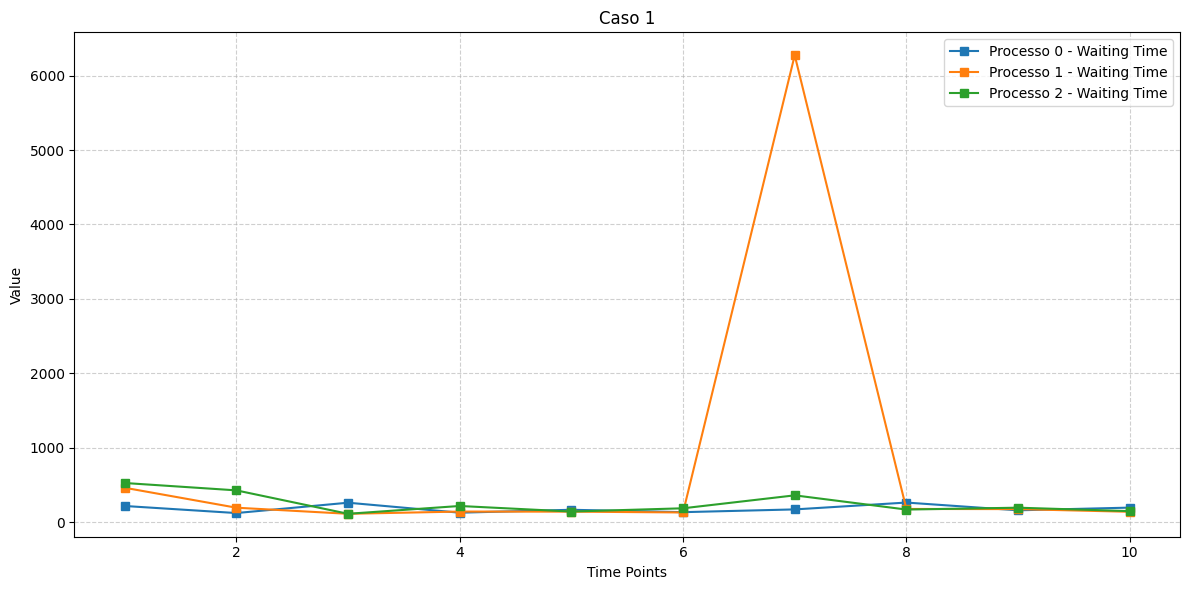

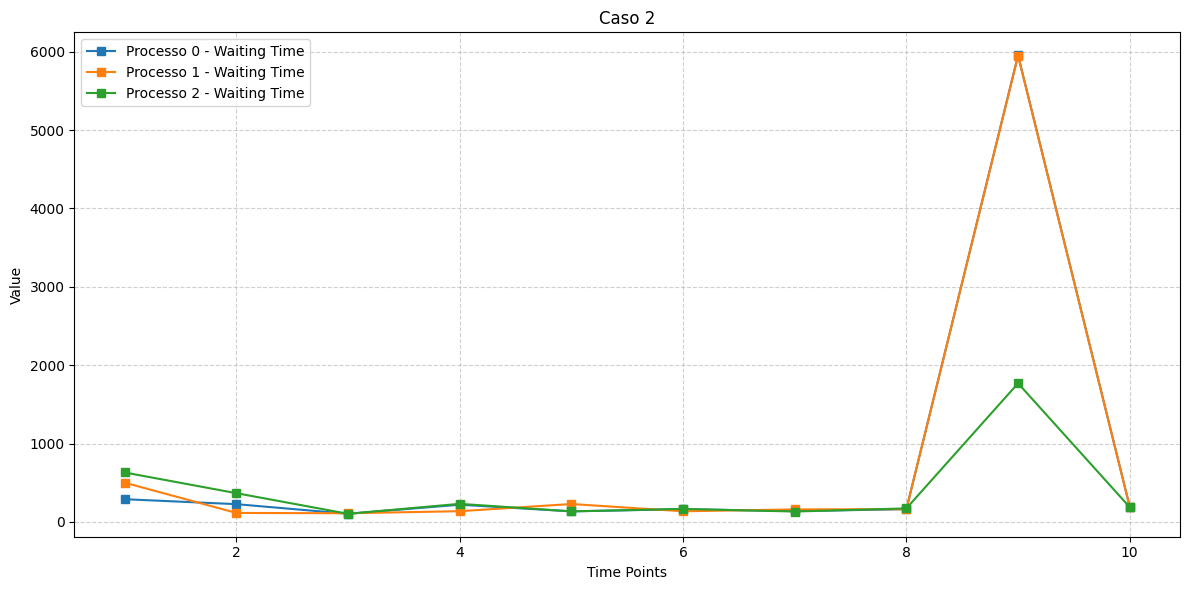

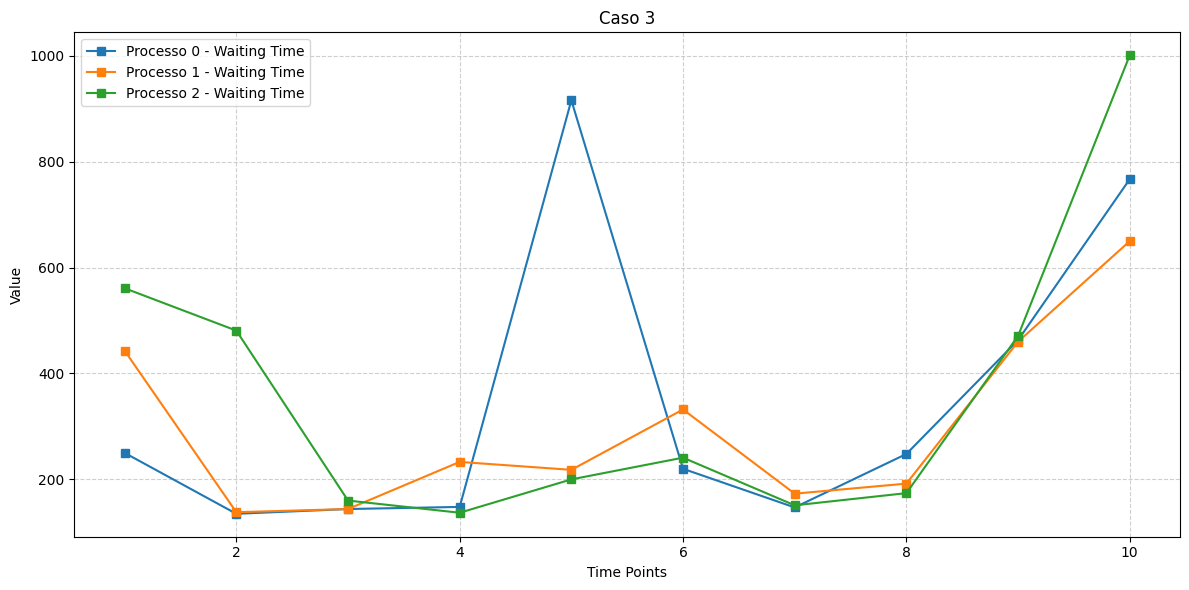

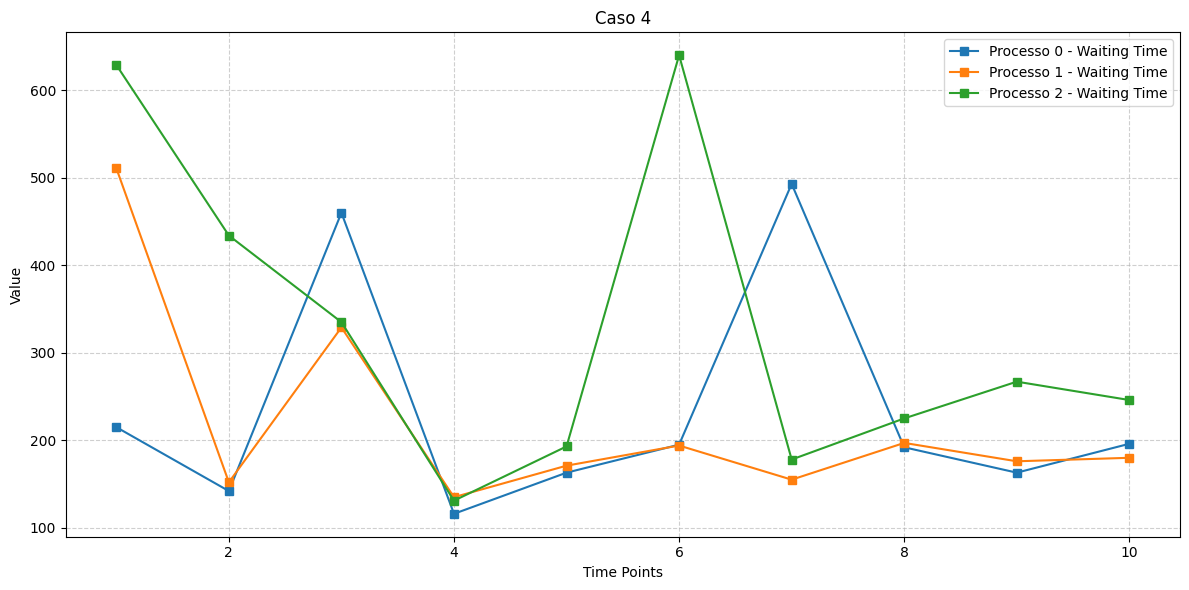

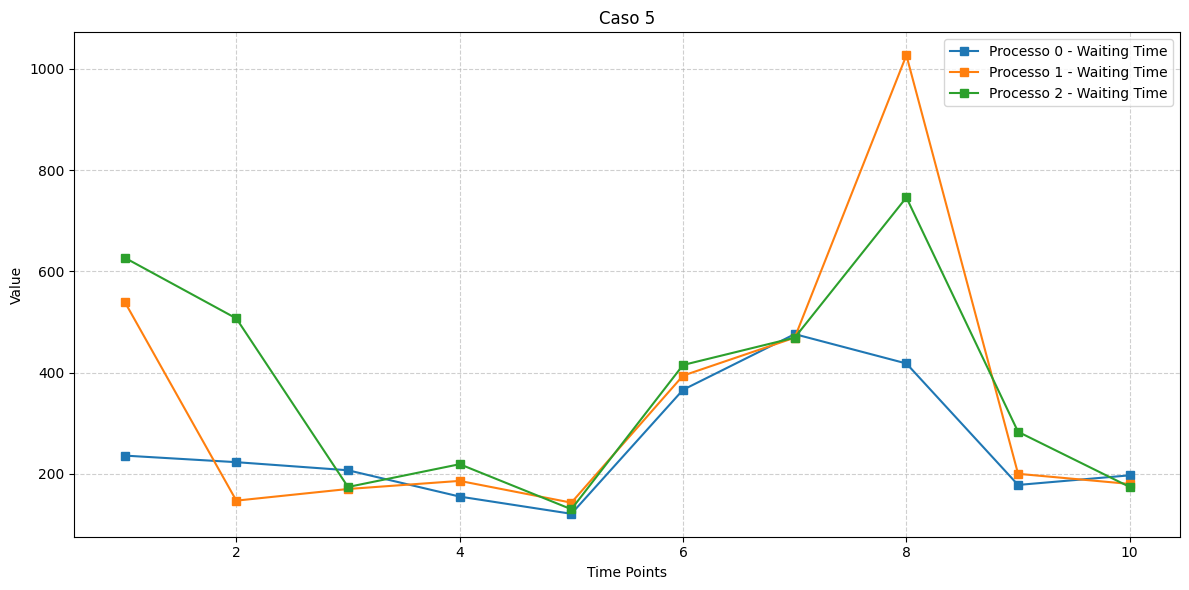

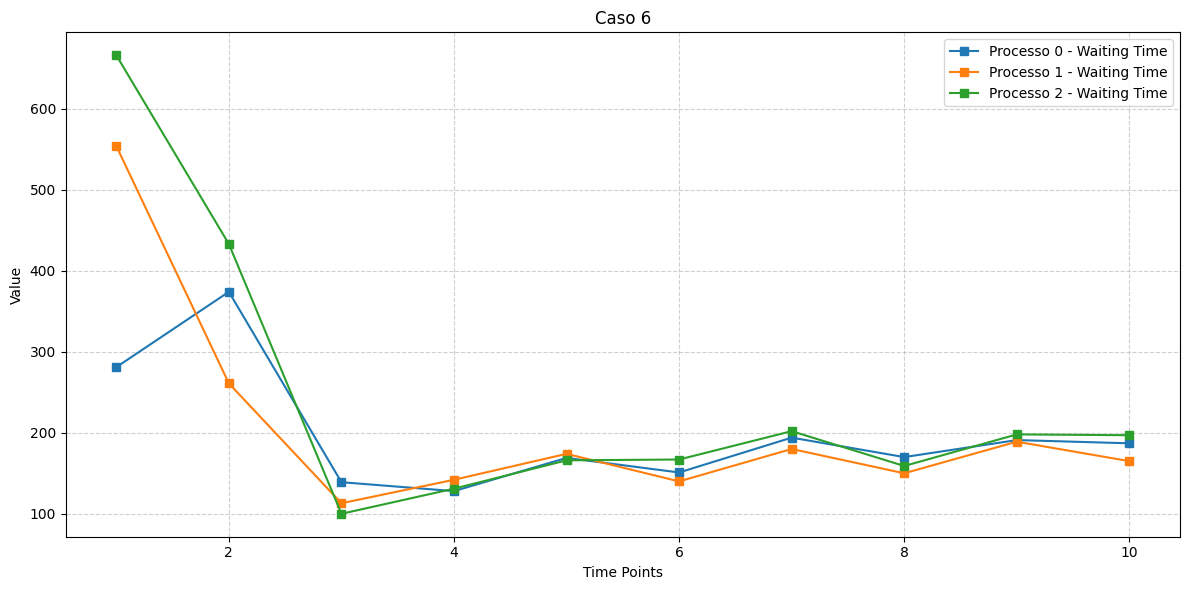

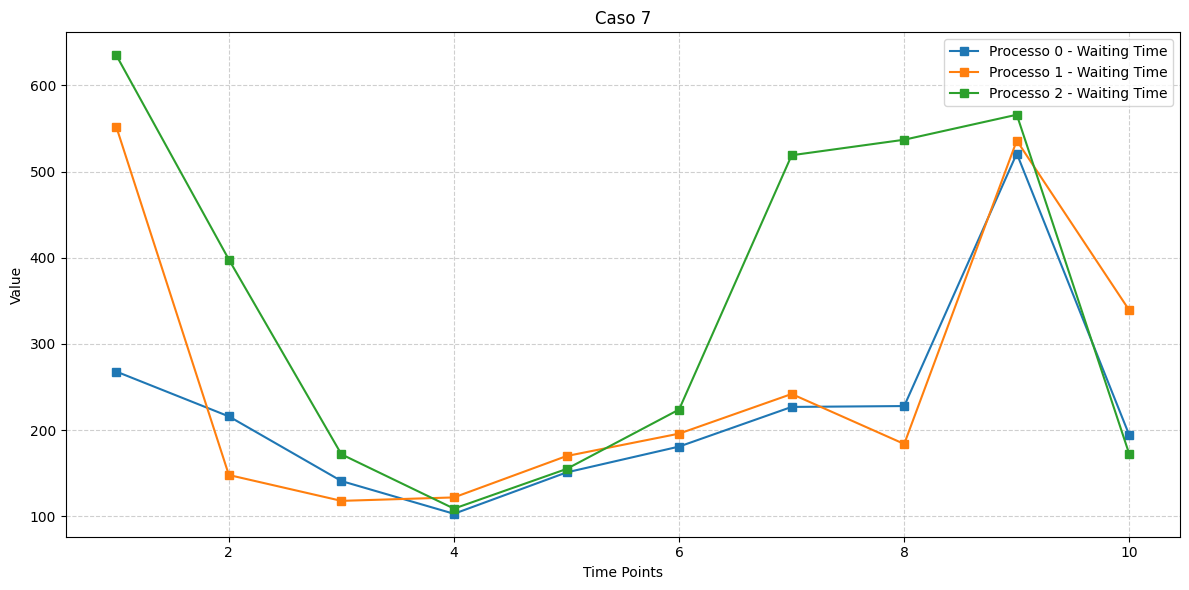

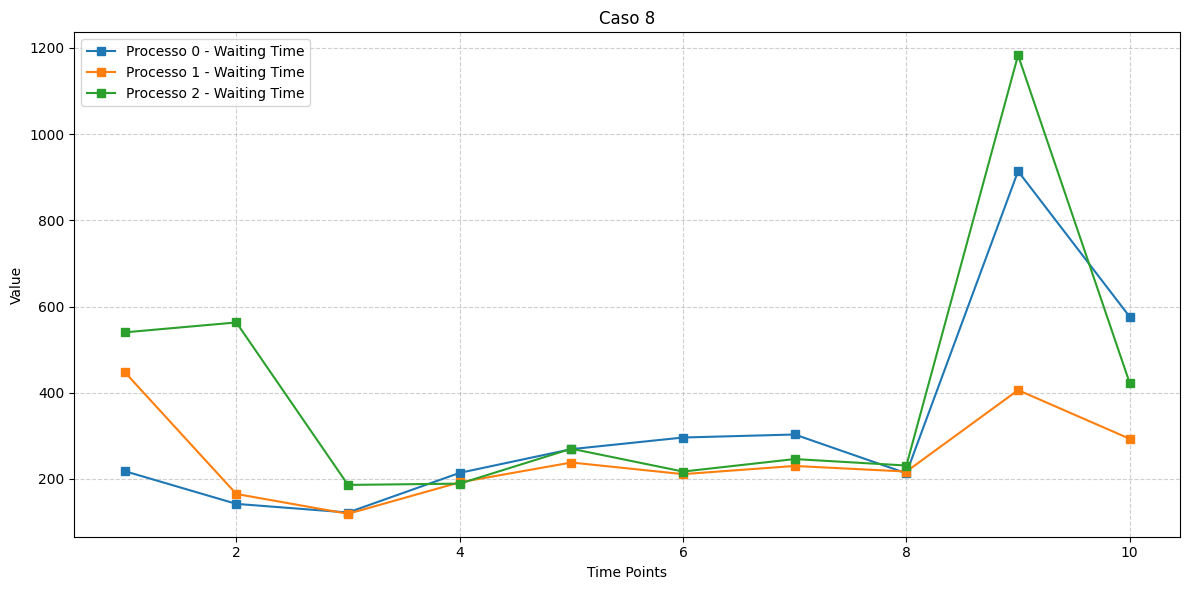

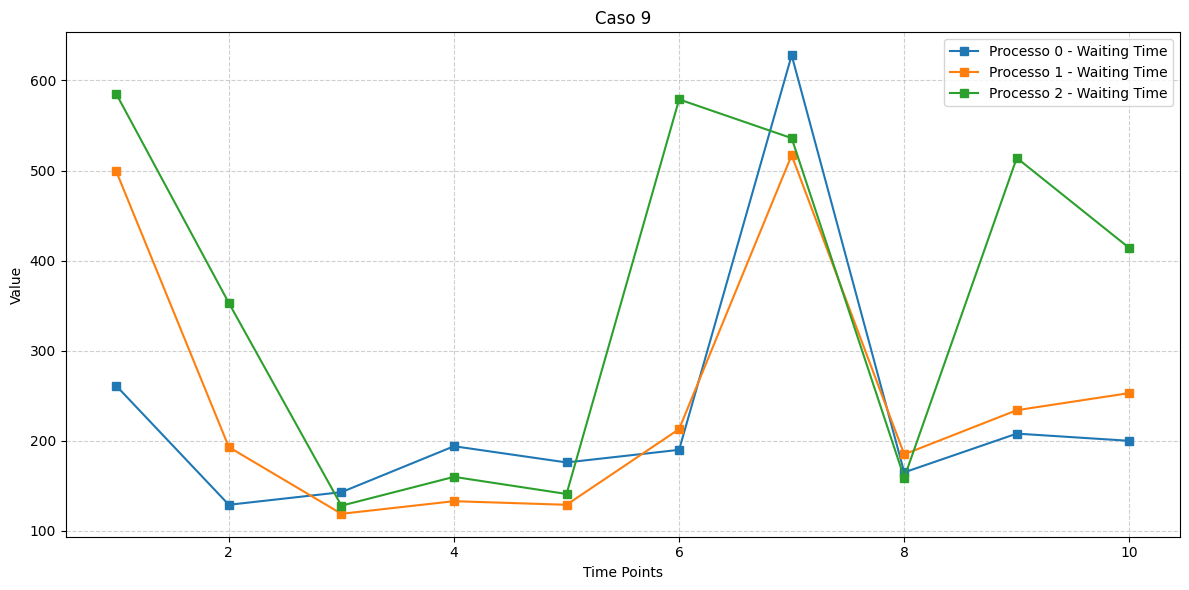

FileNotFoundError: [Errno 2] No such file or directory: 'data_folder/data10.txt'

In [126]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_values(file_path):
    data = defaultdict(lambda: {"cpu_times": [], "waiting_times": [], "timestamps": []})

    with open(file_path, 'r') as file:
        content = file.read()

    # Define the regex pattern to extract values
    pattern = r"Processo:\s*(\d+)\nCpu time:\s*(\d+)\nWaiting time:\s*(\d+)\nTimestamp:\s*(\d+)"

    # Find all matches in the content
    matches = re.findall(pattern, content)

    # Aggregate values for each Processo
    for match in matches:
        processo = int(match[0])
        data[processo]["cpu_times"].append(int(match[1]))
        data[processo]["waiting_times"].append(int(match[2]))
        data[processo]["timestamps"].append(int(match[3]))

    return data

def plot_lines(data, title):
    # Set the figure size (increase the width)
    plt.figure(figsize=(12, 6))  # 12 is the width, 6 is the height

    for processo, values in data.items():
        time_points = [i + 1 for i in range(len(values["cpu_times"]))]

        # plt.plot(time_points, values["cpu_times"], label=f"Processo {processo} - CPU Time", marker='o')
        plt.plot(time_points, values["waiting_times"], label=f"Processo {processo} - Waiting Time", marker='s')
        # plt.plot(time_points, values["timestamps"], label=f"Processo {processo} - Timestamp", marker='^')

    plt.xlabel("Time Points")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage

for i in range(0, 20):
    file_path = f"data_folder/data{i}.txt"  # Replace with the actual file path
    values = extract_values(file_path)
    plot_lines(values, f"Caso {i}")



defaultdict(<function process_all_files.<locals>.<lambda> at 0x7f65e8da5760>, {0: {'cpu_times': [3306, 4552, 6219, 8734, 10981, 9852, 10498, 13277, 33678, 22732], 'waiting_times': [2831, 2025, 1953, 1714, 2617, 2227, 3290, 2535, 9103, 3061], 'timestamps': [6137, 6577, 8172, 10448, 13598, 12079, 13788, 15812, 42781, 25793]}, 1: {'cpu_times': [1567, 4522, 5374, 7157, 11388, 10238, 14464, 18837, 33335, 19876], 'waiting_times': [5533, 1908, 1566, 1723, 1914, 2696, 8704, 2931, 8775, 2755], 'timestamps': [7100, 6430, 6940, 8880, 13302, 12934, 23168, 21768, 42110, 22631]}, 2: {'cpu_times': [1440, 2777, 5490, 8177, 11762, 12707, 11482, 13484, 35278, 17709], 'waiting_times': [6650, 4964, 1759, 1858, 2200, 3254, 3071, 2955, 5785, 4478], 'timestamps': [8090, 7741, 7249, 10035, 13962, 15961, 14553, 16439, 41063, 22187]}})


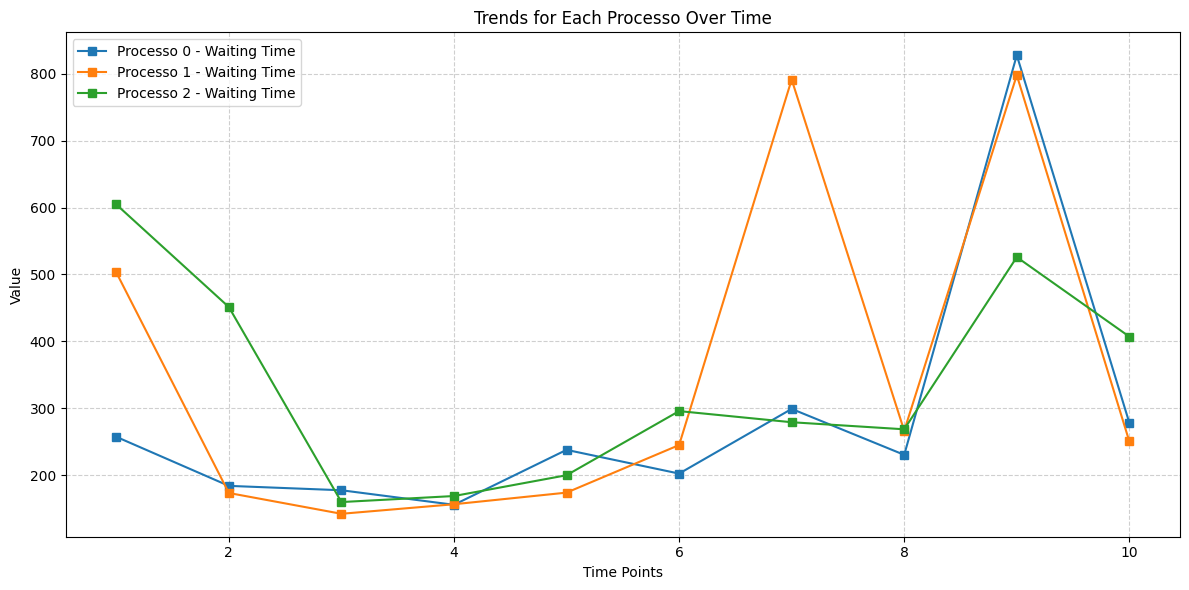

In [127]:
import re
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

total = 0

def extract_values_from_file(file_path):
    data = defaultdict(lambda: {"cpu_times": [], "waiting_times": [], "timestamps": []})

    with open(file_path, 'r') as file:
        content = file.read()

    # Define the regex pattern to extract values
    pattern = r"Processo:\s*(\d+)\nCpu time:\s*(\d+)\nWaiting time:\s*(\d+)\nTimestamp:\s*(\d+)"

    # Find all matches in the content
    matches = re.findall(pattern, content)

    # Aggregate values for each Processo
    for match in matches:
        processo = int(match[0])
        data[processo]["cpu_times"].append(int(match[1]))
        data[processo]["waiting_times"].append(int(match[2]))
        data[processo]["timestamps"].append(int(match[3]))

    return data

def process_all_files(folder_path):
    all_data = defaultdict(lambda: {"cpu_times": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ], "waiting_times": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "timestamps": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})

    # Get all .txt files in the folder
    file_paths = glob.glob(f"{folder_path}/*.txt")

    for file_path in file_paths:
        global total
        total += 1
        file_data = extract_values_from_file(file_path)
        # Combine data from all files
        for processo, values in file_data.items():
            for i in range(len(values["cpu_times"])):
                all_data[processo]["cpu_times"][i] += values["cpu_times"][i]
                all_data[processo]["waiting_times"][i] += values["waiting_times"][i]
                all_data[processo]["timestamps"][i] += values["timestamps"][i]
    
    print (all_data)
    return all_data

def plot_lines(data):
    # Set the figure size (increase the width)
    plt.figure(figsize=(12, 6))  # 12 is the width, 6 is the height

    for processo, values in data.items():
        data[processo]["cpu_times"] = [i/total for i in values["cpu_times"]]
        data[processo]["waiting_times"] = [i/total for i in values["waiting_times"]]
        data[processo]["timestamps"] = [i/total for i in values["timestamps"]]

    for processo, values in data.items():
        # Increase each time point by 1
        time_points = [i + 1 for i in range(len(values["cpu_times"]))]

        # plt.plot(time_points, values["cpu_times"], label=f"Processo {processo} - CPU Time", marker='o')
        plt.plot(time_points, values["waiting_times"], label=f"Processo {processo} - Waiting Time", marker='s')
        # plt.plot(time_points, values["timestamps"], label=f"Processo {processo} - Timestamp", marker='^')

    plt.xlabel("Time Points")
    plt.ylabel("Value")
    plt.title("Trends for Each Processo Over Time")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = "data_folder"  # Replace with the actual folder path containing .txt files
all_values = process_all_files(folder_path)
plot_lines(all_values)

